# Social Media may affect generations differently

Synthia Sasulski (@synthia2080), Ash Kandari (), Xavier Skinner (), Luis de Santos (), Ethan Ng (@eng25)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from ml_analysis import *
from helper_code import *

# Imports for Visual 2
from eng_helper_code import *
from eng_notebook_functions import snsPlot
from eng_notebook_functions import diffSocialPlot

### Introduction

In today’s world, social media plays a significant role in our lives, often more than traditional face-to-face communication. With its rapid growth, there's a need to understand how it affects people's mental health, across various age groups. Our research investigates the relationship between social media usage and its impact on different generations, from young to old, to determine if the effect varies with age. We start with the hypothesis that the influence of social media is not uniform across generations and aim to explore the depth of this impact on mental well-being.

In [2]:
NSDUH2021Cols = ["AGE3","IRSEX","AUINPYR","AURXYR","YEATNDYR","YESCHFLT","YEPRBSLV","DSTNRV30","DSTHOP30","DSTCHR30","DSTNGD30","DSTWORST","DSTNRV12","DSTHOP12","DSTCHR12","DSTNGD12","IMPCONCN","IMPGOUT","IMPPEOP","IMPSOC","IMPSOCM","SUICTHNK","SUIPLANYR","ADDPREV"]; NSDUH201819Cols = ["AGE2", "IRSEX", "AUINPYR","AURXYR","YEATNDYR","YESCHFLT","YEPRBSLV","DSTNRV30","DSTHOP30","DSTCHR30","DSTNGD30","DSTWORST","DSTNRV12","DSTHOP12","DSTCHR12","DSTNGD12","IMPCONCN","IMPGOUT","IMPPEOP","IMPSOC","IMPSOCM","SUICTHNK","ADDPREV"]
CoreTrends2021Cols = ["web1a", "web1b", "web1c", "web1d", "web1e","sns2a", "sns2b", "sns2c", "sns2d", "sns2e","gender", "age"]; CoreTrends2019Cols = ["web1a", "web1b", "web1c", "web1d", "web1e","sns2a", "sns2b", "sns2c", "sns2d", "sns2e","sex", "age"]; CoreTrends2018Cols = ["web1a", "web1b", "web1c", "web1d", "web1e","sns2a", "sns2b", "sns2c", "sns2d", "sns2e","sex", "age"]
NSDUH2019_wantedCols = readInAndGetWantedColumns("datasets/National Survey on Drug Use and Health 2019/NSDUH_2019_Tab.txt", "txt", NSDUH201819Cols); NSDUH2018_wantedCols = readInAndGetWantedColumns("datasets/National Survey on Drug Use and Health 2018/NSDUH_2018_Tab.tsv", "tsv", NSDUH201819Cols); NSDUH2021_wantedCols = readInAndGetWantedColumns("datasets/National Survey on Drug Use and Health 2021/NSDUH_2021_Tab.txt", "txt", NSDUH2021Cols)
CoreTrends2021_wantedCols = readInAndGetWantedColumns("datasets/Jan-25-Feb-8-2021-Core-Trends-Survey/Jan 25-Feb 8, 2021 - Core Trends Survey - CSV.csv", "csv", CoreTrends2021Cols); CoreTrends2019_wantedCols = readInAndGetWantedColumns("datasets/January-8-February-7-2019-Core-Trends-Survey-SPSS/January 8-February 7, 2019 - Core Trends Survey - CSV.csv", "csv", CoreTrends2019Cols); CoreTrends2018_wantedCols = readInAndGetWantedColumns("datasets/January 3-10, 2018 - Core Trends Survey/January 3-10, 2018 - Core Trends Survey - CSV.csv", "csv", CoreTrends2018Cols)

### Data/Cleaning (code in helper_code.py)
For both Datasets, first all data is converted to numeric
<br><ins>CoreTrends Dataset [cleanUpCoreTrends()]: </ins>
<br>Drop 'sns2a' column since all values are empty.
<br>Remove values over 98 since those indicate a refused/skipped.
<br>Cut age data into bins representing ranges of ages to match with NSDUH.
<br>Melt the data into longform, using selected id and values.
<br>Convert the values from ints to more descriptive value then drop null values.
<br><br>
<ins>NSDUH Dataset [cleanUpNSDUH()]:</ins>
<br>Remove values over 85 because those indicate a refused/skipped.
<br>Cut age data into matching bins as CoreTrends
<br>Cut the desired column values into two bins for more relevant/consistent data.
<br>Melt the data into longform, using selected id and values
<br>Rename AGE2/AGE3 column to age, for consistency and drop null values



In [3]:
CoreTrends_id = ['age']; CoreTrends_values = ["web1a", "web1b", "web1c", "web1d", "web1e"]
NSDUH_id=['AGE2']; NSDUH_values = ['DSTCHR12']
CoreTrends2018_long = cleanUpCoreTrends(CoreTrends2018_wantedCols, CoreTrends_id, CoreTrends_values); CoreTrends2019_long = cleanUpCoreTrends(CoreTrends2019_wantedCols, CoreTrends_id, CoreTrends_values); CoreTrends2021_long = cleanUpCoreTrends(CoreTrends2021_wantedCols, CoreTrends_id, CoreTrends_values)
NSDUH2018_long = cleanUpNSDUH(NSDUH2018_wantedCols,NSDUH_id,NSDUH_values); NSDUH2019_long = cleanUpNSDUH(NSDUH2019_wantedCols,NSDUH_id,NSDUH_values); NSDUH2021_long = cleanUpNSDUH(NSDUH2021_wantedCols,['AGE3'],NSDUH_values)

## EDA

<ins>Preliminary Analysis:</ins>
For these graphs, we used NSDUH2019_wantedCols and CoreTrends2019_wantedCols to represent the ages and genders. For NSDUH, the ages are mapped oddly, for example, 1 is 12 y.o., 17 is 65+ y.o. The average age is 11, which mapped to actual age is 22/23 y.o. Ages in CoreTrends are just the direct age, because of the inconsistency between the dataset mappings, it is something we must fix with bucketing. NSDUH also has significantly more elements which will need to be accounted for during any possible merging/comparison between the 2 datasets.
<br><ins>Interesting Findings:</ins>
In the countplot of the NSDUH2019_wantedCols, people that were the age of 15 had the highest count on the graph. In NSDUH there was significantly more amount of 35-49, denote by the mapping 15, with a skew towards ages 22+. However, in CoreTrends the age distributive was more even with a slight skew of 48-72 years old. In the NSDUH gender column, 2 is female and 1 is male. Interestingly enough there are more female respondents. However, in CoreTrends, with the same mapping, there are more male than female respondents.

EDA goes here******


### Visual 1

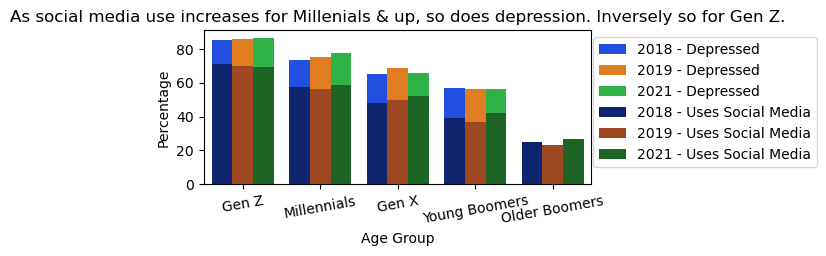

In [4]:
percDepressed_NSDUH2018 = getPercentage(NSDUH2018_long, "Depressed", "age", 2018); percDepressed_NSDUH2019 = getPercentage(NSDUH2019_long, "Depressed", "age", 2019); percDepressed_NSDUH2021 = getPercentage(NSDUH2021_long, "Depressed", "age", 2021)
SMUse_sum_CoreTrends2018 = getPercentage(CoreTrends2018_long, "Uses Social Media", "age", 2018); SMUse_sum_CoreTrends2019 = getPercentage(CoreTrends2019_long, "Uses Social Media", "age", 2019); SMUse_sum_CoreTrends2021 = getPercentage(CoreTrends2021_long, "Uses Social Media", "age", 2021)
CoreTrends_SMUseSum_concat = pd.concat([SMUse_sum_CoreTrends2018,SMUse_sum_CoreTrends2019, SMUse_sum_CoreTrends2021]);NSDUH_concat = pd.concat([percDepressed_NSDUH2018,percDepressed_NSDUH2019,percDepressed_NSDUH2021])
plt.figure(figsize=(5, 2))
sns.barplot(data=NSDUH_concat, x='age', y='percentage',hue='dataset', palette='bright'); sns.barplot(data=CoreTrends_SMUseSum_concat, x='age', y='percentage', hue='dataset' ,palette='dark')
plt.title("As social media use increases for Millenials & up, so does depression. Inversely so for Gen Z.")
plt.ylabel("Percentage"); plt.xlabel("Age Group"); plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1)); plt.xticks(rotation=10);

The most interesting result from this data is non-intuitive correllations between the 2 trends in the graph.
For 18-25 year olds (roughly Gen Z), there was an inverse correlation. The percentage of those depressed consistently increased, while social media usage consistently decreased. However for ages 26-49 (roughly Millenials & Gen X), both depression and social media usage percentages increased.For ages 50-64, Depression remained relatively unchaged while social media usage increased. And for ages 60+ there was no data on Depression so a correllation cannot be made, unless we interpret that as people 65+ refusing to acknowledge mental health which would be an interesting result.
The most surprising result is regarding Gen Z having the inverse correlation with depression and social media usage, as one may have expected a result similar to those for Millenials/Gen X. However, what isn't surprising is the fact that the percentages of those depressed decreases throughout the generations as younger people are often more willing/open to acknowledge and in some cases even embrace their mental health struggles.

### Visual 2

In [5]:
# Reload Datasets
NSDUH2018df = buildNSDUH2018df()
NSDUH2019df = buildNSDUH2019df()
NSDUH2021df = buildNSDUH2021df()
coreTrends2018df = buildCoreTrends2018df()
coreTrends2019df = buildCoreTrends2019df()
coreTrends2021df = buildCoreTrends2021df()

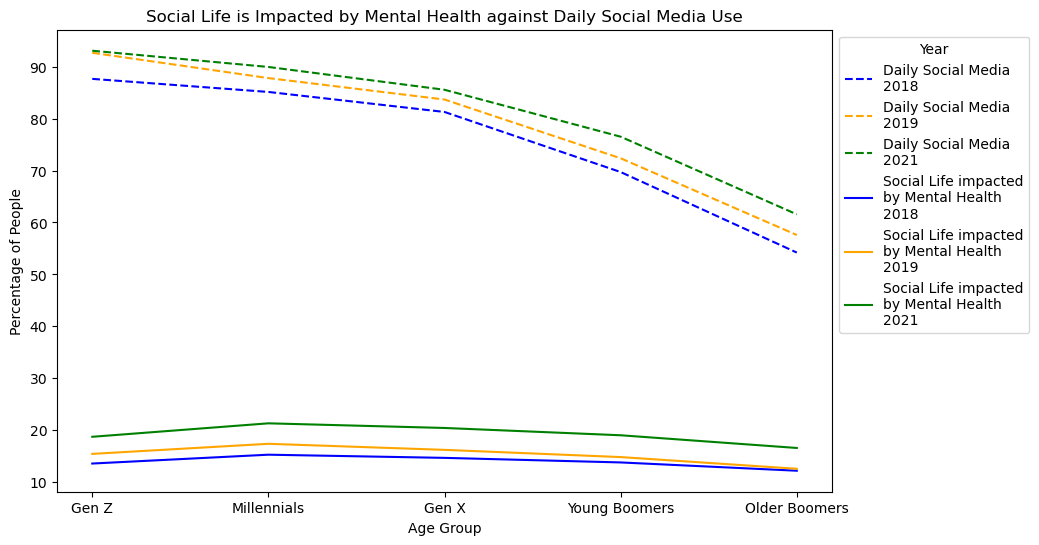

In [6]:
# Create a single figure and axis for all plots
fig, ax = plt.subplots(figsize=(10, 6))

# Call snsPlot for each DataFrame and year
snsPlot(coreTrends2018df, '2018', ax, 'blue')
snsPlot(coreTrends2019df, '2019', ax, 'orange')
snsPlot(coreTrends2021df, '2021', ax, 'green')

# Call diffSocialPlot for each DataFrame and year, using the same axis
diffSocialPlot(NSDUH2018df, ax, '2018', 'blue')
diffSocialPlot(NSDUH2019df, ax, '2019', 'orange')
diffSocialPlot(NSDUH2021df, ax, '2021', 'green')

# Set the title and labels, and show the legend
sns.set_palette("dark")
plt.title('Social Life is Impacted by Mental Health against Daily Social Media Use')
plt.xlabel('Age Group')
plt.ylabel('Percentage of People')
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1,1))

# Show the plot
plt.show()

This graph is composed of two plots over the course of 3 years. 
The first is of the number of people that reported that they felt that their social life had been negatively impacted by their mental health.
The second is of the number of people that reported that they used Social Media on a daily basis.
A notable observation from the data is the discernible correlation between the escalating trend in daily Social Media usage and the simultaneous rise in individuals reporting adverse impacts on their social well-being which they attribute to mental health factors. Furthermore, this pattern persists almost uniformly across all generations.
This suggests a potential correlation, or even causation, between the two trends. However, confirming this would require additional data.

### Visual 3

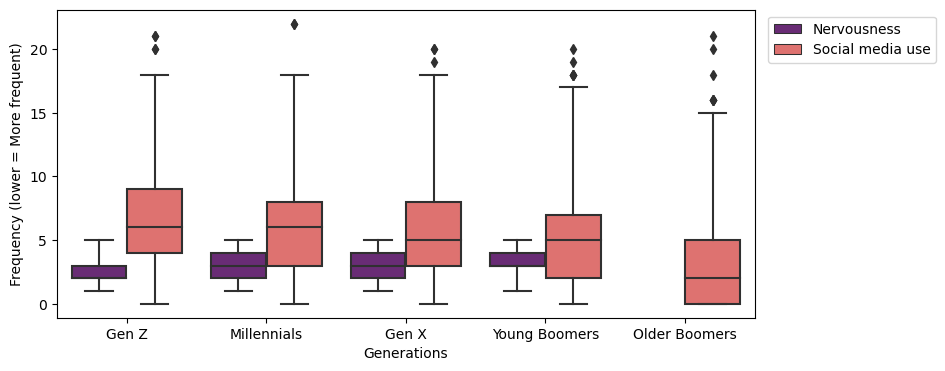

In [16]:
id = ['AGE'];vals = ['DSTNRV12'];CoreTrends_id = ['age'];CoreTrends_values = ["totalFreq"]

NSDUH2018_long = cleanUpNS(NSDUH2018_wantedCols, id, vals, 2018);NSDUH2019_long = cleanUpNS(NSDUH2019_wantedCols, id, vals, 2019);NSDUH2021_long = cleanUpNS(NSDUH2021_wantedCols, id, vals, 2021)
CoreTrends2018_long = cleanUpCT(CoreTrends2018_wantedCols, CoreTrends_id, CoreTrends_values);CoreTrends2019_long = cleanUpCT(CoreTrends2019_wantedCols, CoreTrends_id, CoreTrends_values);CoreTrends2021_long = cleanUpCT(CoreTrends2019_wantedCols, CoreTrends_id, CoreTrends_values)
expNS1 = pd.concat([NSDUH2018_long,NSDUH2019_long, NSDUH2021_long]);expCT1 = pd.concat([CoreTrends2018_long,CoreTrends2019_long, CoreTrends2021_long])
CT_t = expCT1.rename(columns={"Frequency of Social Media Use": "Frequency (lower = More frequent)"});NS_t = expNS1.rename(columns={"Nervousness": "Frequency (lower = More frequent)"})
CT_NS = pd.concat([NS_t, CT_t])
plt.figure(figsize=(9, 4))
sns.boxplot(data=CT_NS, x='Generations', y="Frequency (lower = More frequent)", hue="variable", whis=2, palette="magma")
plt.legend(loc='upper right', bbox_to_anchor=(1.27, 1))

This graph shows a comparative analysis of nervousness and social media use across the five generations. The data is visualized with a boxplot showcasing the minimum, first quartile(Q1), median, third quartile(Q3), and maximum; the outliers are shown as diamonds. For genZ and millennials, we can see that these groups show that they feel nervous more often and also use social media more than the older generations; for Gen Z especially, there is a higher average level of nervousness compared to their social media usage, the spread of data for nervousness shows that they experience it pretty frequently. Gen X shows lower usage of social media and nervousness than younger generations. Also, the difference in nervousness levels among Gen X is not as wide compared to Gen Z or Millenials. Young Boomers and Older Boomers both report very low nervousness and social media usage; this could be because of the fact that the boomer generation seems to be negligent towards admitting the feeling of nervousness. However, for young boomers, we can see that there is a bit more variation in how often they feel nervous. It appears that the younger the generation is, the more often they report feeling nervous, and the more their frequency of using social media, and this trend lessens as we go up the generations. We can see that there is a noticeable decrease in both behaviors as the age increases.

### ML 1

### ML 2 - KNN (ml_analysis.py)

In [8]:
knnClassifier("IMPSOCM") #May take a bit over a minute to run

Accuracy for 9 neighbors: 75.55%


This KNN model uses the age, gender, amount of depression and hopelessness felt in the past year to predict whether or not the person has had difficulties socializing due to mental health. When experimenting with various features, using only age/gender or only other mental health metrics yielded very weak results, ~30% accuracy, but once we include the depression feature alongside age/gender, it jumps to 71%. When experimenting with adding other mental health related features, most barely increased beyond 71%, except for the feelings of hopelessness feature, which helped increase the accuracy to 75.55%. What this tells us is that age/gender alone has little to do with difficulties socializing due to mental health, and that age/gender alongside feelings of depression/hopelessness are unsurprisingly, better indicators. Feelings of hopelessness adding a relatively significant amount to the accuracy, specifically, shows that while feelings of depression significantly factors into socializing, once someone loses hope, they may feel no desire/reason to socialize even more, since it may seem like a futile endeavor to them, compared to simply not having enough mental energy.

# Reflection


<ins>Project Challenges:</ins> Improving model accuracy beyond the current 58%. Integrating varying yearly datasets and harmonizing the data for the model input.
<br><ins>Initial Insights:</ins> There is a year-by-year complex relationship between social media usage and age groups, with a notable inverse trend in Gen Z.
<br><ins>Concrete Results:</ins> We can see the Visual trends in data and current SVM model metrics, indicating room for improved classification.
<br><ins>Major Issues:</ins> Dataset integration across years is problematic, affecting model performance. Feature selection and model choice require reevaluation for capturing complex patterns.
<br><ins>Project Timeline:</ins> Potential delays from data integration and feature refinement. Need a little bit more time for model experimentation.
<br><ins>Project Viability:</ins> The project's relevance to mental health justifies continuation. Encouraging patterns and data complexity indicate potential for deeper insights with advanced modeling.

# Next Steps

For the next month, we believe the focus will be on improving the machine learning model's predictive performance and integrating the datasets from different years more effectively. There are still trends in the data that need to be explored and we know that our dataset is rich and complex leading to more informative visualizations. Next steps:
<br><ins>Model Refinement:</ins> Implement Recursive Feature Elimination and other methods for feature selection.Explore gradient boosting machines and deep learning models, alongside existing ensemble methods.
<br><ins>Project Goal Evaluation focuses:</ins> Enhanced model performance surpassing the 58% baseline. The quality of insights linking social media usage to mental health. The model's predictive reliability across demographics and over time.



### Conclusion

The idea of this project was to identify correlations between social media usage and mental health across generations. What we saw from our data visualization helped us identify some correlations that do exist. The trends seen in the visualizations indicate a complex and variable relationship, which is not one-dimensional in nature. For Gen Z we saw an inverse correlation between social media usage and depresssion, which was something that we did not expect to see. In terms of social life imapcted by negative mental health in relevance to social media usage we noticed the trend that as social media increased, people who reported negative impact on their social with negative mental health also increase, and this trend was infact consistent across generations. In terms of nervousness we saw that Gen Z and Millenials reported higher levels of nervousness with more frequent social media usage, even though the trend decreased with age. We saw that there are areas where there is more to the story than numbers, such as no data on depression for people above 60+ which could be missing for multiple reasons such as negligence etc.

In sum, the findings suggest that the correlations between social media use, mental health, and the impact on daily social life are complex and vary with age. While younger generations report more significant mental health challenges with increased social media use, this pattern is less evident in older generations. These insights underscore the need for a nuanced approach to digital well-being across the lifespan. Future research should continue to build on these findings, aiming for a comprehensive understanding that could inform interventions tailored to each generation's unique needs and experiences.